      ToplamUretim
year              
2015  2.563193e+08
2016  3.406977e+08
2017  4.116520e+08
2018  3.584643e+08
      ToplamUretim
year              
2015  2.037102e+09
2016  3.024893e+09
2017  2.754608e+09
2018  2.276409e+09
      ToplamUretim  ToplamUretimNew
year                               
2015  2.037102e+09    -1.740436e+08
2016  3.024893e+09    -1.057724e+09
2017  2.754608e+09    -1.041270e+09
2018  2.276409e+09    -6.497779e+08
      ToplamUretim
year              
2015  9.139334e+08
2016  1.018900e+09
2017  1.303969e+09
2018  1.288174e+09
      ToplamUretim  ToplamUretimNew
year                               
2015  9.139334e+08     9.139334e+08
2016  1.018900e+09     1.018900e+09
2017  1.303969e+09     5.391389e+08
2018  1.288174e+09     7.777573e+08


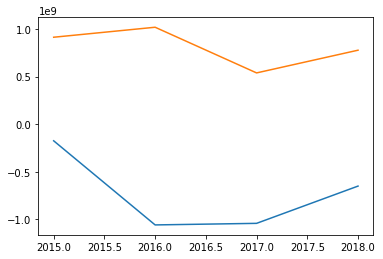

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from openpyxl.workbook import Workbook

pd.set_option('display.expand_frame_repr', False)

from datetime import datetime 
from dateutil.relativedelta import *
import os.path
df_arrays=[]
i=0
date=datetime.strptime('012015', "%m%Y").date()

while True:
  
    file_name=r'C:\Python_Projects\Proje_1\datas\Prim_%s.xls'%(date.strftime('%m%Y'))  
    #print(date.strftime('%m%Y'))
    if not os.path.isfile(file_name):
        break;
        if date>datetime.strptime('102018', "%m%Y").date():
            break
        continue;
    xls_file1 = pd.ExcelFile(file_name)
    df1 = xls_file1.parse('Genel Toplam', skiprows=5)
    df_1=df1.iloc[:,1:5]
    new_column=pd.to_datetime(date.strftime("%Y-%m"))
    df_1_1=df_1.assign(dates= new_column)
   
    
    df_1_1.columns=['Sirket','Sirket Kodu','Toplam Uretim','Pazar Payi','Dates']
    
    df_arrays.append(df_1_1)
    date=date+relativedelta(months=+1)
           



result=pd.concat(df_arrays,sort=False,ignore_index=True)
result = result.sort_values(by=['Sirket Kodu','Dates'], inplace=False)
result.columns=['Sirket','SirketKodu','ToplamUretim','PazarPayi','Dates']
#print(m)
filtered_result = result.query("SirketKodu.notnull() and Sirket!='SEKTÖR TOPLAMI'",engine='python')
#filtered_result['Sirket Kodu'].values.dtype
filtered_result1 = filtered_result.groupby(by='SirketKodu')
filtered_result2=filtered_result1.apply(lambda x: x.reset_index(drop=True))

filtered_result2['year']=filtered_result2['Dates'].dt.year
#filtered_result2=filtered_result2.loc[:,['ToplamUretim','year']]
filtered_result2['ToplamUretimNew']=filtered_result2['ToplamUretim'].astype(int)
#print(filtered_result2)

#filtered_result.to_xls('output.xls')
#writer = pd.ExcelWriter('output.xlsx')
#filtered_result.to_xls(writer,'Sheet1')


#EXPORT TO EXCEL
#writer = pd.ExcelWriter('summary.xlsx')
#filtered_result.to_excel(writer, index=True)
#writer.save()


##DESCRIPTIVE STATISTICS
filtered_result2.describe()
#filtered_result2.mean()

#Main Insurance Companies
Allianz= filtered_result2[filtered_result2['SirketKodu']==1004]
Anadolu = filtered_result2[filtered_result2['SirketKodu']==1005]
Ak = filtered_result2[filtered_result2['SirketKodu']==1003]
Axa = filtered_result2[filtered_result2['SirketKodu']==1009]
SompoJapan = filtered_result2[filtered_result2['SirketKodu']==1035]

#ALL COMPANIES TOTAL PREMIUM MEAN
All_companies=filtered_result2.loc[:,['ToplamUretim','year']]
All_companies=All_companies.groupby(All_companies['year']).mean()
print(All_companies)

#ALLIANZ TOTAL PREMIUM Mean
Allianz_mean=Allianz.loc[:,['ToplamUretim','year']]
Allianz_mean=Allianz_mean.groupby(Allianz_mean['year']).mean()
print(Allianz_mean)
#print(Allianz)

#ALLIANZ TOTAL PREMIUM Mean
Allianz_meanNew=Allianz.loc[:,['ToplamUretim','ToplamUretimNew', 'year']]
Allianz_meanNew=Allianz_meanNew.groupby(Allianz_meanNew['year']).mean()
print(Allianz_meanNew)

#AK SIGORTA TOTAL PREMIUM MEAN

Ak_mean=Ak.loc[:,['ToplamUretim','year']]
Ak_mean=Ak_mean.groupby(Ak_mean['year']).mean()
print(Ak_mean)

#AK SIGORTA TOTAL PREMIUM MEAN

Ak_meanNew=Ak.loc[:,['ToplamUretim','ToplamUretimNew','year']]
Ak_meanNew=Ak_meanNew.groupby(Ak_meanNew['year']).mean()
print(Ak_meanNew)


#plt.scatter(All_companies,Allianz_mean)

x = All_companies.index
y1 = All_companies['ToplamUretim']
y2 = Allianz_meanNew['ToplamUretimNew']
y3 =Ak_meanNew['ToplamUretimNew']

#plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

#print(x.index)

#print(Allianz.index)
#print(Allianz_mean)

#Allianz['ToplamUretim'].plot()
#plt.show()

#for c,name in filtered_result1.groups: 
 #   print(c)
  #  print(name)

#for name, group in filtered_result1: 
    # print the name of the regiment
    #print(name)
    # print the data of that regiment
    #print(group)
    #if name==1001:
         #print(name)
    # print the data of that regiment
        # print(group)
         #print("abcvdkklkşkş")
   
        
    #else:
       # break;




In [17]:
filtered_result2.describe()



SirketKodu         1.694925e+03
ToplamUretim       3.394258e+08
PazarPayi          1.602840e-02
year               2.016375e+03
ToplamUretimNew    2.007437e+08
dtype: float64

In [20]:
All_companies=filtered_result2.groupby(filtered_result2['year']).mean()
print(All_companies)

       SirketKodu  ToplamUretim  PazarPayi  ToplamUretimNew
year                                                       
2015  1718.968750  2.563193e+08   0.015625     1.698897e+08
2016  1698.250326  3.406977e+08   0.015645     1.633451e+08
2017  1680.073003  4.116520e+08   0.016540     2.382844e+08
2018  1676.213894  3.584643e+08   0.016453     2.466779e+08


In [23]:
Allianz_mean=Allianz.loc[:,['ToplamUretim','year']]
Allianz_mean=Allianz_mean.groupby(Allianz_mean['year']).mean()
print(Allianz_mean)
print(Allianz)

      ToplamUretim
year              
2015  2.037102e+09
2016  3.024893e+09
2017  2.754608e+09
2018  2.276409e+09
                           Sirket  SirketKodu  ToplamUretim  PazarPayi      Dates  year  ToplamUretimNew
SirketKodu                                                                                              
1004.0     0   Allianz Sigorta AŞ      1004.0  3.782571e+08   0.123616 2015-01-01  2015        378257127
           1   Allianz Sigorta AŞ      1004.0  6.218240e+08   0.116168 2015-02-01  2015        621823952
           2   Allianz Sigorta AŞ      1004.0  9.046878e+08   0.114334 2015-03-01  2015        904687750
           3   Allianz Sigorta AŞ      1004.0  1.244728e+09   0.119467 2015-04-01  2015       1244728014
           4   Allianz Sigorta AŞ      1004.0  1.537019e+09   0.120267 2015-05-01  2015       1537018838
           5   Allianz Sigorta AŞ      1004.0  1.838133e+09   0.120622 2015-06-01  2015       1838132721
           6   Allianz Sigorta AŞ      1004.0 

In [27]:
All_companies=filtered_result2.loc[:,['ToplamUretim','year']]
All_companies=All_companies.groupby(filtered_result2['year']).mean()
print(All_companies)

      ToplamUretim  year
year                    
2015  2.563193e+08  2015
2016  3.406977e+08  2016
2017  4.116520e+08  2017
2018  3.584643e+08  2018


In [50]:
filtered_result2=filtered_result1.apply(lambda x: x.reset_index(drop=True))
print(filtered_result2)
filtered_result2.loc[filtered_result2.index[0], 'Sirket']
print(filtered_result2.index[1])

                                               Sirket  SirketKodu  ToplamUretim  PazarPayi      Dates
SirketKodu                                                                                           
1001.0     0   Ace European Group Ltd. Türkiye Şubesi      1001.0  5.558404e+06   0.001817 2015-01-01
           1   Ace European Group Ltd. Türkiye Şubesi      1001.0  1.014411e+07   0.001895 2015-02-01
           2   Ace European Group Ltd. Türkiye Şubesi      1001.0  1.794620e+07   0.002268 2015-03-01
           3   Ace European Group Ltd. Türkiye Şubesi      1001.0  2.839670e+07   0.002725 2015-04-01
           4   Ace European Group Ltd. Türkiye Şubesi      1001.0  3.588368e+07   0.002808 2015-05-01
           5   Ace European Group Ltd. Türkiye Şubesi      1001.0  4.283985e+07   0.002811 2015-06-01
           6   Ace European Group Ltd. Türkiye Şubesi      1001.0  5.001665e+07   0.002848 2015-07-01
           7   Ace European Group Ltd. Türkiye Şubesi      1001.0  5.743376e+07   